<a href="https://colab.research.google.com/github/sukha002/AIDI/blob/master/1002/AIDI_1002_DL_framework_exercises_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: If you are having difficulty installing the tensorflow, keras and pytorch libraries, use google colab!


# Exercises:
- modify above NN model with different number of dense layers, hidden units, loss function, # of training epochs etc to identify a prediction model with better performance (i.e., lower MAE value and higher r2 value) 

# Library imports

In [ ]:
import numpy as np
import pandas as pd
import keras 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Keras implementations

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 404 training samples and 102 test samples, 
# each with 13 numerical feature
print("train_data.shape", train_data.shape)

# normalize the data
mean = train_data.mean(axis=0)

train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

train_data.shape (404, 13)


In [ ]:
# few samples are available, use a very small network 
# with two hidden layers, each with 64 units. 
# In general, the less training data you have, 
# the worse overfitting will be, and using a small network 
# is one way to mitigate overfitting.

from keras import models, layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.01)))
#     model.add(layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.05)))

    # network ends with a single unit and no activation. 
    # This is a typical setup for scalar regression 
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # StochSTIC
    
    
    return model

In [ ]:
model = build_model()

model.fit(train_data, train_targets, epochs=120, batch_size=19, verbose=0)

#epochs = 80
# Batch_size = 25, 240, 32


test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("test_mae_score", np.round(test_mae_score,3)) 

# mae value around 2.54 -> \$2,540 
# (house price range \$10,000-\$50,000)

## P. Garima_test_mae_score 2.712

4/4 [==============================] - 0s 4ms/step - loss: 11.9399 - mae: 2.3889
test_mae_score 2.389


# PyTorch implementations

In [ ]:
#Define the model 
import torch
import torch.nn as nn
import torch.nn.functional as F

## data preprocessing
- data house pricing data is downloaded from another source in this exercise

In [ ]:
#From sklearn tutorial.
from sklearn.datasets import load_boston
boston = load_boston()
# print( "Type of boston dataset:", type(boston))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#A bunch is you remember is a dictionary based dataset.  Dictionaries are addressed by keys. 
#Let's look at the keys. 
# print(boston.keys())

#DESCR sounds like it could be useful. Let's print the description.
# print(boston['DESCR'])

In [ ]:
# Let's change the data to a Panda's Dataframe
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Now add the column names.
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#This will throw and error at import if haven't upgraded. 
# from sklearn.cross_validation  import train_test_split  
from sklearn.model_selection  import train_test_split
#y is the dependent variable.
y = boston_df['PRICE']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
#Change to numpy array. 
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

In [ ]:
#Define training hyperprameters.
batch_size = 76
num_epochs = 200
learning_rate = 0.01
size_hidden= 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix
n_output=1


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)

#Create the model object
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

model_pytorch = Net(cols, size_hidden, n_output)

Executing the model on : cpu


In [ ]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.AdamW(model_pytorch.parameters(), lr=learning_rate)

# Optimiser changed

#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.SmoothL1Loss()  # this is for regression mean squared loss

## Hit and Trial 

In [ ]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    
    #Shuffle just mixes up the dataset between epochs
    X_train, y_train = shuffle(X_train, y_train)
    
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_pytorch(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    # print progress every 20th epoch
    if (epoch+1) % 20 == 0:
        print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0



Epoch 20 loss:  29.221850872039795
Epoch 40 loss:  25.656131505966187
Epoch 60 loss:  22.528278827667236
Epoch 80 loss:  23.148338079452515
Epoch 100 loss:  17.845216751098633
Epoch 120 loss:  17.833611369132996
Epoch 140 loss:  17.606022357940674
Epoch 160 loss:  17.66217052936554
Epoch 180 loss:  16.283684015274048
Epoch 200 loss:  14.950451850891113


In [ ]:
#This is a little bit tricky to get the resulting prediction.  
def calculate_r2_mae(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """

    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    
    result = model_pytorch(X) #This outputs the value for regression
    result = result.data[:,0].numpy()
  
    if len(y) != 0:
        r2 = r2_score(result, y)
        mae = mean_absolute_error(result, y)
        print("R-Squared: %.3f, MAE: %.2f" %(r2, mae))
        
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

In [ ]:
result1 = calculate_r2_mae(X_train,y_train)
result2 = calculate_r2_mae(X_test,y_test)


# MAE must be mininmum
# R-Squared must be high


# R-Squared: 0.905, MAE: 1.89
# R-Squared: 0.678, MAE: 2.74


R-Squared: 0.865, MAE: 2.28
R-Squared: 0.484, MAE: 3.52


## Wine Quality 

In [ ]:
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv ", sep = ';' )
 
# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ", sep = ';' )

In [ ]:
# white.insert(loc = 12, column = "Type", value = 0)

In [ ]:
# red.insert(loc = 12, column = "Type", value = 1)

In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
print(white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
print(red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


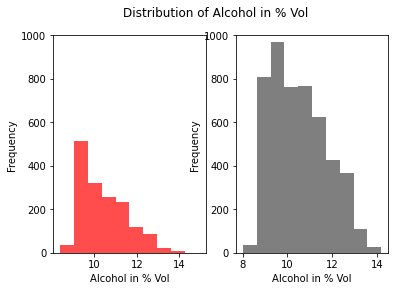

In [ ]:
# Histogram

fig, ax = plt.subplots(1, 2)
 
ax[0].hist(red.alcohol, 10, facecolor ='red', alpha = 0.7, label ="Red Wine")
 
ax[1].hist(white.alcohol, 10, facecolor ='black', alpha = 0.5, label ="White Wine")
 
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
 
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [ ]:
white['type'] = 0
red['type'] = 1

df = red.append(white, ignore_index = True)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5355,5.5,0.17,0.23,2.9,0.039,10.0,108.0,0.99243,3.28,0.50,10.0,5,0
5932,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,0
765,9.2,0.67,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6,1
5409,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,0
6075,6.0,0.20,0.38,1.3,0.034,37.0,104.0,0.98865,3.11,0.52,12.7,6,0


In [ ]:
from sklearn.model_selection import train_test_split
    
X = df.iloc[:, 0:11]
y = np.ravel(df.type)
 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 25)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
 

model.add(Dense(12, activation ='relu', input_shape =(11, )))
 

model.add(Dense(8, activation ='relu'))

model.add(Dense(4, activation ='relu'))

model.add(Dense(1, activation ='sigmoid'))
 

In [ ]:


model.output_shape
 


(None, 1)

In [ ]:

model.summary()
 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                144       
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:


model.get_config()
 


{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'name': 'dense_24_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_24',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

In [ ]:

model.get_weights()
model.compile(loss ='binary_crossentropy',
  optimizer ='adam', metrics =['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10,
           batch_size = 5, verbose = 1)

y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/10
975/975 [==============================] - 3s 3ms/step - loss: 0.2607 - accuracy: 0.9144
Epoch 2/10
975/975 [==============================] - 4s 4ms/step - loss: 0.2099 - accuracy: 0.9329
Epoch 3/10
749/975 [======================>.......] - ETA: 0s - loss: 0.1971 - accuracy: 0.9354